### Data-driven optimization and decision making

### Final project

Juha Reinikainen

In [2]:
import model
import data
import algorithm
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.operators.mixed_variable_operator import MixedVariableSampling, MixedVariableMutation, MixedVariableCrossover
from pymoo.visualization.pcp import PCP
import numpy as np

# import warnings
# warnings.simplefilter("ignore")

# reload changes to self written files
%load_ext autoreload
%autoreload 2


In [3]:
df, esg = data.get_data_df()

n_stocks = df.shape[1]
population_size = 100
n_generations = 1000
min_weight = 0.01
max_weight = 0.8
min_stocks = 4
max_stocks = 20

#weight for each stock and whether to 
variable_type_mask = ["real" for _ in range(n_stocks)] + ["bin" for _ in range(n_stocks)]

sampling = MixedVariableSampling(variable_type_mask, {
    "real": get_sampling("real_random"),
    "bin": get_sampling("bin_random")
})

crossover = MixedVariableCrossover(variable_type_mask, {
    "real": get_crossover("real_sbx", prob=1.0, eta=3.0),
    "bin": get_crossover("bin_two_point")
})

mutation = MixedVariableMutation(variable_type_mask, {
    "real": get_mutation("real_pm", eta=3.0, prob=1/50),
    "bin": get_mutation("bin_bitflip", prob=1/50)
})

problem = model.PortfolioSelection(df, esg, min_weight, max_weight, min_stocks, max_stocks, n_stocks)

repairMethod = algorithm.OneSumRepair(min_weight, max_weight, n_stocks)

In [4]:
# initial_population = algorithm.createInitialPopulation(population_size, n_stocks)
nsga2 = NSGA2(
    pop_size = population_size, 
    sampling=sampling,
    crossover = crossover,
    mutation = mutation,
    repair = repairMethod
)
res = minimize(problem, nsga2, ("n_gen", n_generations), seed=1, verbose = True)



n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     100 |  0.00000E+00 |  5.010000000 |       6 |            - |            -
    2 |     200 |  0.00000E+00 |  1.620000000 |       2 |  0.933919050 |        ideal
    3 |     300 |  0.00000E+00 |  0.090000000 |       6 |  0.376983787 |        ideal


c:\Users\Juha Reinikainen\Documents\dataopt\env\lib\site-packages\pymoo\operators\crossover\sbx.py:45: RuntimeWarning: invalid value encountered in power
  betaq[mask] = np.power((rand * alpha), (1.0 / (self.eta + 1.0)))[mask]


    4 |     400 |  0.00000E+00 |  0.00000E+00 |       9 |  0.403949665 |        ideal
    5 |     500 |  0.00000E+00 |  0.00000E+00 |      16 |  0.366716821 |        ideal
    6 |     600 |  0.00000E+00 |  0.00000E+00 |      23 |  0.105595196 |        ideal
    7 |     700 |  0.00000E+00 |  0.00000E+00 |      33 |  0.046654446 |        ideal
    8 |     800 |  0.00000E+00 |  0.00000E+00 |      41 |  0.081648644 |        ideal
    9 |     900 |  0.00000E+00 |  0.00000E+00 |      49 |  0.096999564 |        ideal
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |      61 |  0.114744518 |        ideal
   11 |    1100 |  0.00000E+00 |  0.00000E+00 |      74 |  0.069829892 |        ideal
   12 |    1200 |  0.00000E+00 |  0.00000E+00 |      91 |  0.042569066 |        ideal
   13 |    1300 |  0.00000E+00 |  0.00000E+00 |     100 |  0.044570616 |        ideal
   14 |    1400 |  0.00000E+00 |  0.00000E+00 |     100 |  0.007112367 |        ideal
   15 |    1500 |  0.00000E+00 |  0.00000E+00 |     10

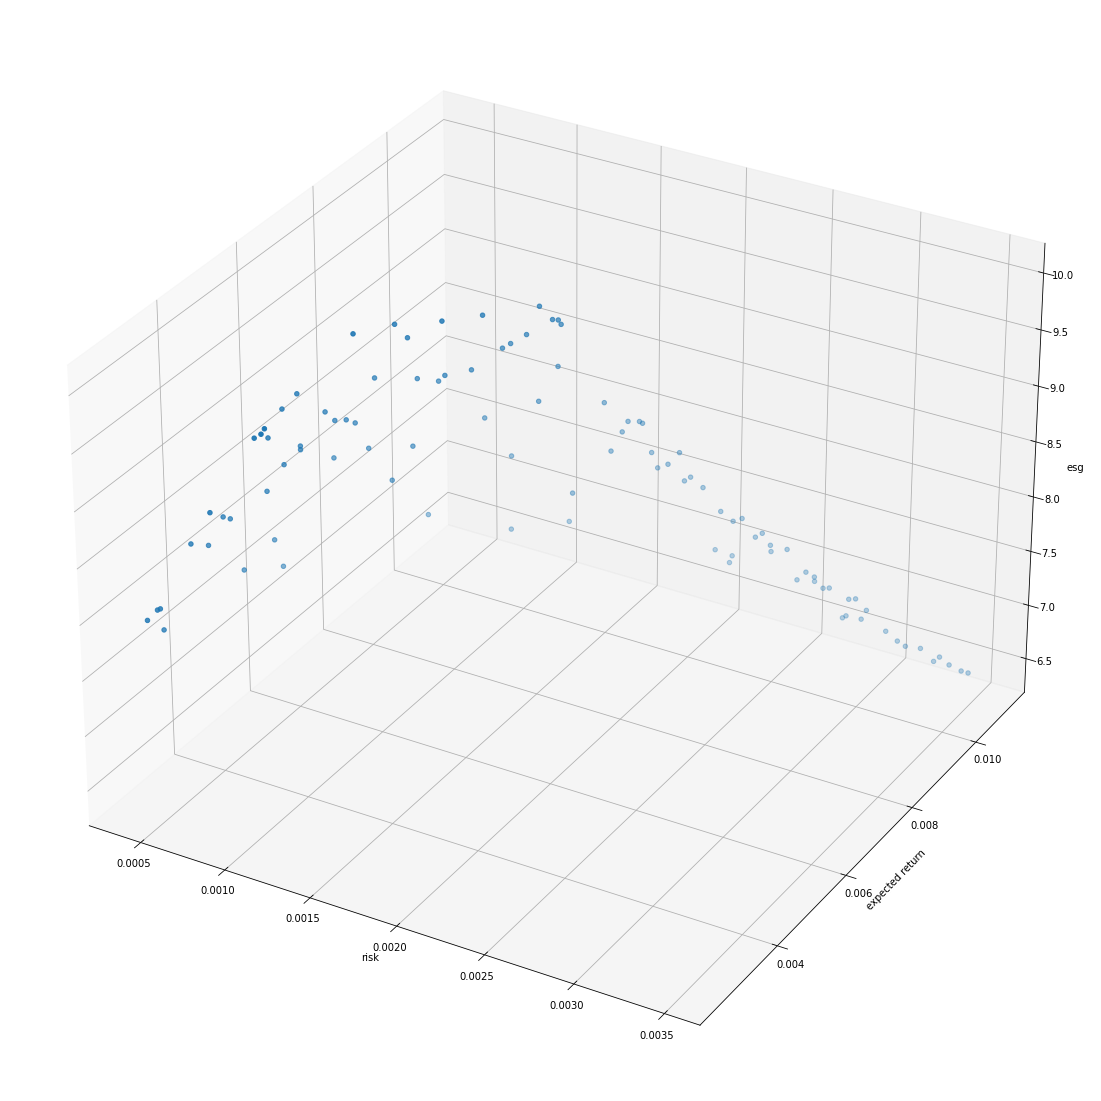

In [5]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')

ax.scatter(res.F[:,1], -res.F[:,0], -res.F[:,2])
ax.set_xlabel("risk")
ax.set_ylabel("expected return")
ax.set_zlabel("esg")
plt.show()

In [6]:
Wfinal = res.X[:,:n_stocks]
Yfinal = res.X[:,n_stocks:]
WYfinal = res.X[:,:n_stocks] * res.X[:, n_stocks:] 
#weights add to one?
print((WYfinal).sum(axis=1))

nStocksInEachSolution = Yfinal.sum(axis=1)
#number of stocks between min_stocks and max_stocks?
print(np.logical_and(nStocksInEachSolution >= min_stocks, nStocksInEachSolution <= max_stocks))

[1.0000000000000002 1.0 1.0 1.0 1.0 1.0000000000000002 1.0
 0.9999999999999999 0.9999999999999999 0.9999999999999999
 0.9999999999999999 0.9999999999999997 1.0 0.9999999999999999 1.0 1.0 1.0
 1.0 0.9999999999999999 1.0 1.0 0.9999999999999999 0.9999999999999999
 0.9999999999999999 1.0 1.0 0.9999999999999999 1.0 0.9999999999999998
 0.9999999999999998 0.9999999999999998 0.9999999999999999 1.0
 0.9999999999999999 1.0000000000000002 1.0 1.0 0.9999999999999999 1.0 1.0
 0.9999999999999999 0.9999999999999996 0.9999999999999998 1.0 1.0
 0.9999999999999998 0.9999999999999997 1.0 1.0 0.9999999999999999
 0.9999999999999998 0.9999999999999996 1.0 0.9999999999999999
 0.9999999999999999 1.0 1.0000000000000002 1.0000000000000002 1.0 1.0
 1.0000000000000002 0.9999999999999999 1.0 1.0 1.0 1.0000000000000002 1.0
 0.9999999999999997 1.0 0.9999999999999999 1.0 1.0000000000000002
 0.9999999999999999 0.9999999999999998 0.9999999999999999 1.0
 0.9999999999999999 0.9999999999999999 0.9999999999999999 1.0
 0.99

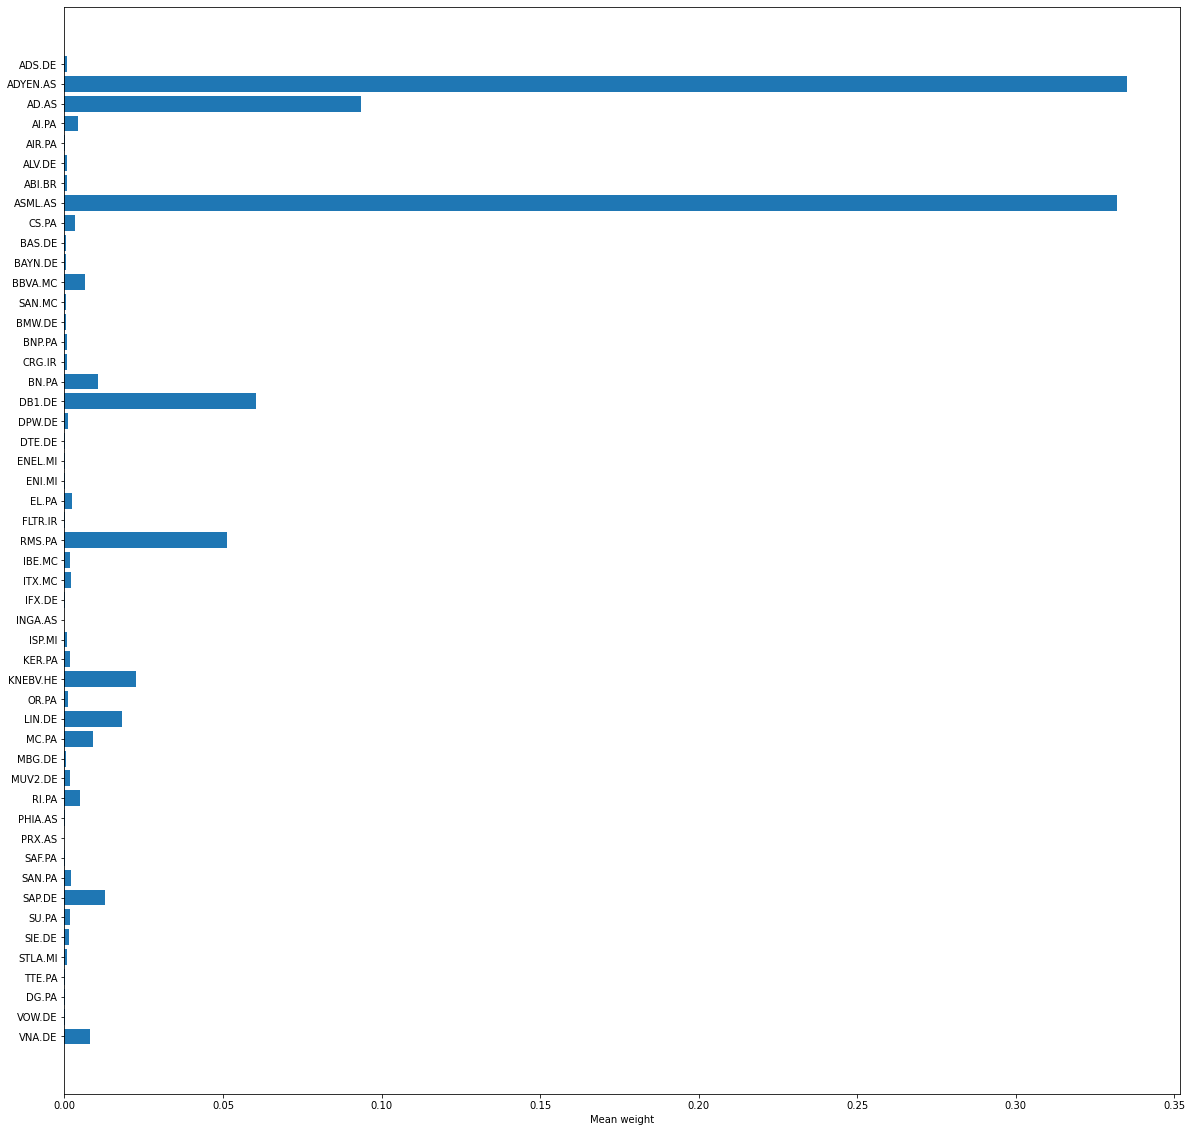

In [7]:
#mean weight for each stock
Wmean = WYfinal.mean(axis=0)
fig, ax = plt.subplots(figsize=(20,20))
ax.barh(range(len(Wmean)), Wmean)
ax.set_yticks(range(len(Wmean)), labels=data.STOCKNAMES)
ax.invert_yaxis()
ax.set_xlabel("Mean weight")

plt.show()

0.010956026769110368 0.002451663612024159
0.00041328353607479373 0.003471162271945567
10.000000000000002 6.442168674698795
(100, 3)


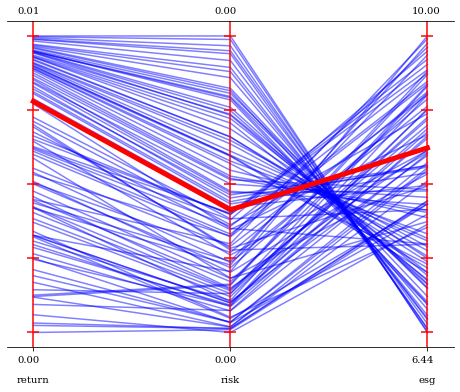

In [30]:
print(-res.F[:,0].min(),-res.F[:,0].max())
print(res.F[:,1].min(),res.F[:,1].max())
print(-res.F[:,2].min(),-res.F[:,2].max())
FPCP = np.array([-res.F[:,0], res.F[:,1], -res.F[:,2]]).T
print(FPCP.shape)
pcpPlot = PCP(labels=["return", "risk", "esg"])
pcpPlot.add(FPCP, color="blue", alpha=0.3)
pcpPlot.add(FPCP[57], linewidth=5, color="red")
pcpPlot.show()

In [9]:
np.save("./data/F.npy", res.F)

In [19]:
portfolioWeights = WYfinal[57]
portfolioObjValues = FPCP[57]

In [28]:
print(portfolioWeights)
sizeIs = [i for i in range(len(portfolioWeights)) if not np.isclose(portfolioWeights[i], 0.0)]
sizes = portfolioWeights[sizeIs]
names = np.array(data.STOCKNAMES)[sizeIs]
for weight,nameOfStock in zip(sizes, names):
    print(nameOfStock, weight)

print()
print("return",portfolioObjValues[0])
print("risk",portfolioObjValues[1])
print("ESG score",portfolioObjValues[2])
# _,plt.pie(sizes, labels = names, autopct='%1.1f%%')
# plt.show()

[0.0 0.31428985265057563 0.0 0.0 0.0 0.0 0.0 0.6215731163968445 0.0 0.0
 0.0 0.0 0.014598526645327787 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.014598526645327787 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.010170725508298376
 0.010170725508298376 0.0 0.0 0.0 0.0 0.0 0.0 0.014598526645327787 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0]
ADYEN.AS 0.31428985265057563
ASML.AS 0.6215731163968445
SAN.MC 0.014598526645327787
RMS.PA 0.014598526645327787
LIN.DE 0.010170725508298376
MC.PA 0.010170725508298376
SAN.PA 0.014598526645327787

return 0.009079083746716923
risk 0.0016782067276679405
ESG score 8.657084083781273
